In [1]:
import h5py
import numpy as np

In [85]:
# f.close()

In [86]:
# f = h5py.File("mytestfile.hdf5","w")
# A = [[1, 2, 3], [4, 5, 6], [7, 8, 9],[10, 11, 12]]
# dset = f.create_dataset("MyDataSet", data = A)
# f.close()

A = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

with h5py.File("mytestfile.hdf5","w") as f:
    dset = f.create_dataset("MyDataSet", data = A)

In [88]:
rf = h5py.File("mytestfile.hdf5","r")
rdset = rf['MyDataSet']

print(f'Full rdset:\n{rdset[...]}\n')
print(rdset[:,::2]) # Testing slicing...
print(f'\nrdset.shape = {rdset.shape[1]}')

rf.close()


Full rdset:
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  3]
 [ 4  6]
 [ 7  9]
 [10 12]]

rdset.shape = 3


In [21]:
# Next plan:
# JSON, into DL1 Keras stuff (there's lots of commands I do not know. Must check keras/tensorflow documentation.)
%history

import h5py
import numpy as np
filename = 'user.jodapalm.28858736._000001.output.h5'
jets = h5py.File(filename, 'r')['jets'][0:50000]
print(jets)
filename = 'user.jodapalm.28858736._000001.output.h5'
jets = h5py.File(filename, 'r')['jets'][0:50000]
print(jets.shape)
filename = 'user.jodapalm.28858736._000001.output.h5'
jets = h5py.File(filename, 'r')['jets']
tracks = h5py.File(filename, 'r')['tracks']

print(jets.shape)
print(tracks.shape)
filename = 'user.jodapalm.28858736._000001.output.h5'
jets = h5py.File(filename, 'r')['jets'][0:50000]
tracks = h5py.File(filename, 'r')['tracks'][0:50000]

print(jets.shape)
print(tracks.shape)
filename = 'user.jodapalm.28858736._000001.output.h5'
jets = h5py.File(filename, 'r')['jets'][0:50000]
tracks = h5py.File(filename, 'r')['tracks'][0:50000]

print(jets.shape)
print(jets.size)
print(type(jets))

print(tracks.shape)
print(tracks.size)
print(type(tracks))
filename = 'user.jodapalm.28858736._000001.output.h5'
jets = h5py.File(filename, 'r')['jets

In [23]:
filename = 'user.jodapalm.28858736._000001.output.h5'

jets = h5py.File(filename, 'r')['jets'][:]
tracks = h5py.File(filename, 'r')['tracks'][:]
print(jets.shape)
print(tracks.shape)

jets1 = h5py.File(filename, 'r')['jets'][0:50000]
tracks1 = h5py.File(filename, 'r')['tracks'][0:50000]

jets2 = h5py.File(filename, 'r')['jets'][50000:100000]
tracks2= h5py.File(filename, 'r')['tracks'][50000:100000]

jets3 = h5py.File(filename, 'r')['jets'][150000:200000]
tracks3= h5py.File(filename, 'r')['tracks'][150000:200000]

print()
print(jets1.shape)
print(jets1.size)
print(type(jets1))

print()
print(tracks1.shape)
print(tracks1.size)
print(type(tracks1))


print()
jets_full = np.append(jets1, jets2, axis = 0)
print(jets_full.shape)
print(jets_full.size)
print(type(jets_full))

print()
tracks_full = np.append(tracks1, tracks2, axis = 0)
print(tracks_full.shape)
print(tracks_full.size)
print(type(tracks_full))

tracks_full = np.append(tracks_full, tracks3, axis = 0)
print(tracks_full.shape)
print(tracks_full.size)
print(type(tracks_full))

(284483,)
(284483, 40)

(50000,)
50000
<class 'numpy.ndarray'>

(50000, 40)
2000000
<class 'numpy.ndarray'>

(100000,)
100000
<class 'numpy.ndarray'>

(100000, 40)
4000000
<class 'numpy.ndarray'>
(150000, 40)
6000000
<class 'numpy.ndarray'>


## Starting with JSON

In [12]:
import json

# some JSON:
x =  '{ "name":"John", "age":30, "city":"New York"}'

# parse x:
y = json.loads(x)

# the result is a Python dictionary:
print(y.keys())
print(y.values())

dict_keys(['name', 'age', 'city'])
dict_values(['John', 30, 'New York'])


In [25]:
# a Python object (dict):
x = {
  "name": "John",
  "age": 30,
  "city": "New York"
}

# convert into JSON:
y = json.dumps(x)

# the result is a JSON string:
print(y, ',' ,type(y)) 

{"name": "John", "age": 30, "city": "New York"} , <class 'str'>
<class 'str'>


In [30]:
print(json.dumps({"name": "John", "age": 30}), ',' ,type(json.dumps({"name": "John", "age": 30})))
print(json.dumps(["apple", "bananas"]), ',' ,type(json.dumps(["apple", "bananas"])))
print(json.dumps(("apple", "bananas")), ',' ,type(json.dumps(("apple", "bananas"))))
print(json.dumps("hello"), ',' ,type(json.dumps("hello")))
print(json.dumps(42), ',' ,type(json.dumps(42)))
print(json.dumps(31.76), ',' ,type(json.dumps(31.76)))
print(json.dumps(True), ',' ,type(json.dumps(True)))
print(json.dumps(False), ',' ,type(json.dumps(False)))
print(json.dumps(None), ',' ,type(json.dumps(None)))

{"name": "John", "age": 30} , <class 'str'>
["apple", "bananas"] , <class 'str'>
["apple", "bananas"] , <class 'str'>
"hello" , <class 'str'>
42 , <class 'str'>
31.76 , <class 'str'>
true , <class 'str'>
false , <class 'str'>
null , <class 'str'>


In [31]:
x = {
  "name": "John",
  "age": 30,
  "married": True,
  "divorced": False,
  "children": ("Ann","Billy"),
  "pets": None,
  "cars": [
    {"model": "BMW 230", "mpg": 27.5},
    {"model": "Ford Edge", "mpg": 24.1}
  ]
}

# convert into JSON:
y = json.dumps(x)

# the result is a JSON string:
print(y)

{"name": "John", "age": 30, "married": true, "divorced": false, "children": ["Ann", "Billy"], "pets": null, "cars": [{"model": "BMW 230", "mpg": 27.5}, {"model": "Ford Edge", "mpg": 24.1}]}


In [75]:
# Testing reading vscode settings.json file:
try:
    setting_json = open('./.vscode/sttings.json') # Typo in setting.json to induce error...
    data = json.load(setting_json)
    print(data)
except:
    print('Error: No such file or directory!')
finally:
    setting_json.close()
    print('file closed...')

Error: No such file or directory!
file closed...


In [73]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!", sys.exc_info()[0], "occurred.")
        print("Next entry.")
        print()
print("The reciprocal of", entry, "is", r)

The entry is a
Oops! <class 'ValueError'> occurred.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occurred.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


In [72]:
import numpy as np

k = 3
for a in np.arange(1, 15, 4):
    if(a%k == 0):
        break

ar = np.arange(1,15,4)
print('First number from', ar.tolist(), 'divisible by', k, ':', a)

First number from [1, 5, 9, 13] divisible by 3 : 9


In [89]:
# If we want to print the error/exception type...
try:
    f = open('./.vscode/se<ttings.json')
except:
    print('error:', sys.exc_info()[0], 'occured.')
finally:
    f.close()
    print('closing file...')

error: <class 'FileNotFoundError'> occured.
closing file...


In [2]:
import numpy as np
a = np.arange(6).reshape(2,3) + 10
np.argmax(a, axis=-1)

array([2, 2])

In [12]:
y_test = [0, 1, 0]
print(f'c-jet: np.argmax(y_test,axis=-1) = {np.argmax(y_test,axis=-1)}')
for output, flavor in zip([0,1,2], ['l','c','b']):
    ix = (np.argmax(y_test,axis=-1) == output)
    print(f'Iteration ({output, flavor}): ix = {ix}')

c-jet: np.argmax(y_test,axis=-1) = 1
Iteration ((0, 'l')): ix = False
Iteration ((1, 'c')): ix = True
Iteration ((2, 'b')): ix = False


In [20]:
import matplotlib.pyplot as plt
y_test[False]

0

In [17]:
np.add.accumulate([2, 3, 5][::-1])

array([ 5,  8, 10])

[0.1 0.4 0.8 1.3 1.9 2.4 2.6 2.7]
[0.1 0.3 0.8 1.4 1.9 2.3 2.6 2.7]
2.7


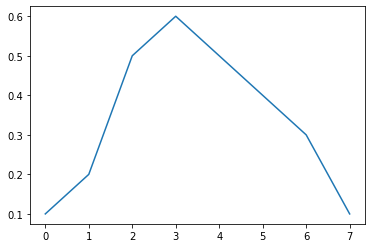

In [36]:
w = [0.1 ,0.2, 0.5, 0.6, 0.5, 0.4, 0.3, 0.1]
plt.plot(w)
print(np.add.accumulate(w[::-1]))
print(np.add.accumulate(w))
print(np.sum(w))

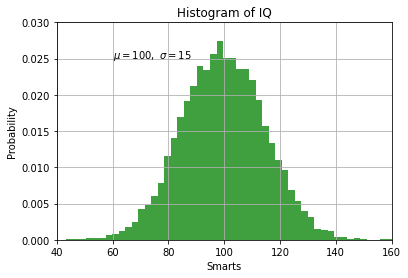

[1.000e-04 2.000e-04 2.000e-04 2.000e-04 4.000e-04 1.100e-03 1.500e-03
 2.300e-03 3.300e-03 6.100e-03 9.400e-03 1.300e-02 2.040e-02 2.980e-02
 4.230e-02 5.840e-02 8.100e-02 1.068e-01 1.382e-01 1.748e-01 2.199e-01
 2.716e-01 3.266e-01 3.818e-01 4.406e-01 4.994e-01 5.636e-01 6.235e-01
 6.784e-01 7.345e-01 7.840e-01 8.288e-01 8.685e-01 9.014e-01 9.286e-01
 9.469e-01 9.609e-01 9.720e-01 9.820e-01 9.878e-01 9.918e-01 9.945e-01
 9.965e-01 9.979e-01 9.985e-01 9.990e-01 9.995e-01 9.996e-01 9.999e-01
 1.000e+00]
[1.000e-04 4.000e-04 5.000e-04 1.000e-03 1.500e-03 2.100e-03 3.500e-03
 5.500e-03 8.200e-03 1.220e-02 1.800e-02 2.800e-02 3.910e-02 5.310e-02
 7.140e-02 9.860e-02 1.315e-01 1.712e-01 2.160e-01 2.655e-01 3.216e-01
 3.765e-01 4.364e-01 5.006e-01 5.594e-01 6.182e-01 6.734e-01 7.284e-01
 7.801e-01 8.252e-01 8.618e-01 8.932e-01 9.190e-01 9.416e-01 9.577e-01
 9.702e-01 9.796e-01 9.870e-01 9.906e-01 9.939e-01 9.967e-01 9.977e-01
 9.985e-01 9.989e-01 9.996e-01 9.998e-01 9.998e-01 9.998e-01 9.99

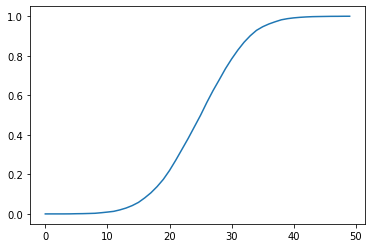

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()
print(np.add.accumulate(n[::-1])/np.sum(n))
print(np.add.accumulate(n)/np.sum(n))
print(np.sum(n))
plt.plot(np.add.accumulate(n[::-1])/np.sum(n))

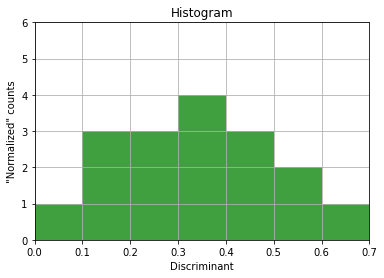

[ 1.  3.  6. 10. 13. 16. 17.]


In [71]:
w = [0.1 ,0.2, 0.5, 0.6, 0.5, 0.4, 0.3, 0.1, 0.25, 0.25, 0.35, 0.35, 0.35, 0.45, 0.45, 0.05, 0.15]
n, bins, _ = plt.hist(w, bins = 7, range = (0, 0.7), density=False, facecolor='g', alpha=0.75)
plt.xlabel('Discriminant')
plt.ylabel('\"Normalized\" counts')
plt.title('Histogram')
plt.xlim(0, 0.7)
plt.ylim(0, 6)
plt.grid(True)
plt.show()
eff = np.add.accumulate(n[::-1])
print(eff)

In [82]:
y_test = [[0, 0, 1],
          [1, 0, 0],
          [0, 1, 0],
          [0, 0, 1]]

ix = (np.argmax(y_test,axis=-1) == 2)
print(ix)
disc = np.array([4, 2, 3, 4])
print(disc[ix])

[ True False False  True]
[4 4]
